# BMEN 509 Assignment 1

Natalie Wong, January 28, 2019

## Question 1
We know that the maximum of the Gaussian line spread function (LSF) occurs where: 

$$y = y_0$$

Therefore, we know that the maximum LSF is simply: 

$$\frac{1}{2\pi\sigma^{2}}e^{\frac{-(y - y_0)^{2}}{2\sigma^{2}}}=\frac{1}{2\pi\sigma^{2}}e^{\frac{-(y_0 - y_0)^{2}}{2\sigma^{2}}}=\frac{1}{2\pi\sigma^{2}}e^{0}=\frac{1}{2\pi\sigma^{2}}$$

The half maximum is thus:

$$\frac{\frac{1}{2\pi\sigma^{2}}}{2}=\frac{1}{4\pi\sigma^{2}}$$

Therefore, we can find the points where the LSF is the half-maximum, and the difference between those points will give us the full-width half-maximum.

$$\frac{1}{2\pi\sigma^{2}}e^{\frac{-(y_{1, 2} - y_0)^{2}}{2\sigma^{2}}}=\frac{1}{4\pi\sigma^{2}}$$
$$\therefore e^{\frac{-(y_{1, 2} - y_0)^{2}}{2\sigma^{2}}}=\frac{1}{2}=2^{-1}$$
$$\therefore \frac{-(y_{1, 2} - y_0)^{2}}{2\sigma^{2}} = ln(2^{-1}) = -ln(2)$$
$$\therefore (y_{1, 2} - y_0)^{2} = 2\sigma^{2}ln(2)$$
$$\therefore y_{1, 2} - y_0 = \pm\sigma\sqrt{2ln(2)}$$
$$\therefore y_{1, 2} = y_0 \pm\sigma\sqrt{2ln(2)}$$

Finally, we can compute the difference:

$$y_1 = y_0 - \sigma\sqrt{2ln(2)}$$
$$y_2 = y_0 + \sigma\sqrt{2ln(2)}$$

$$\therefore y_2 - y_1 = y_0 + \sigma\sqrt{2ln(2)} - (y_0 - \sigma\sqrt{2ln(2)})$$
$$\therefore y_2 - y_1 = 2\sigma\sqrt{2ln(2)}$$
$$\therefore FWHM \approx 2.36\sigma$$

## Question 2

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


$$ f(x,y) = 20sin(2\pi * f_0 x) + 20sin(2\pi * f_0 y) $$

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


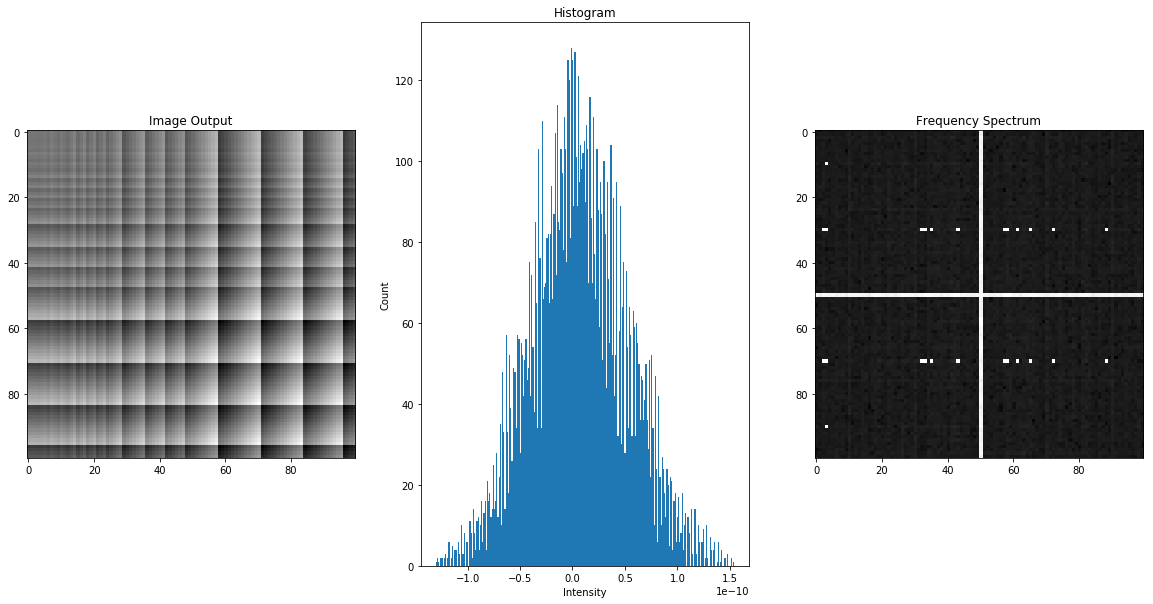

In [35]:
image_size = (100, 100)

A = np.zeros(image_size)

# Choosing arbitrary constant
f_not = 100

for x in range(image_size[0]):
    for y in range(image_size[1]):
        A[x, y] = (20 * np.sin(2 * np.pi * f_not * x)) + (20 * np.sin(2 * np.pi * f_not * y))

f = np.fft.fft2(A)
fshift = np.fft.fftshift(f)
A_fft = 20 * np.log(np.abs(fshift))
        
plt.subplots(1, 3, figsize=(20,10))
plt.subplot(1, 3, 1); plt.imshow(A, cmap='gray'); plt.title('Image Output')
plt.subplot(1, 3, 2); plt.hist(A.ravel(), bins=256); plt.title('Histogram'); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.subplot(1, 3, 3); plt.imshow(A_fft, cmap='gray'); plt.title('Frequency Spectrum')
plt.show()

$$ f(x,y) = 2e^{-\left(\frac{(x-5)^{2}}{2}+\frac{(y-5)^{2}}{2}\right)} $$

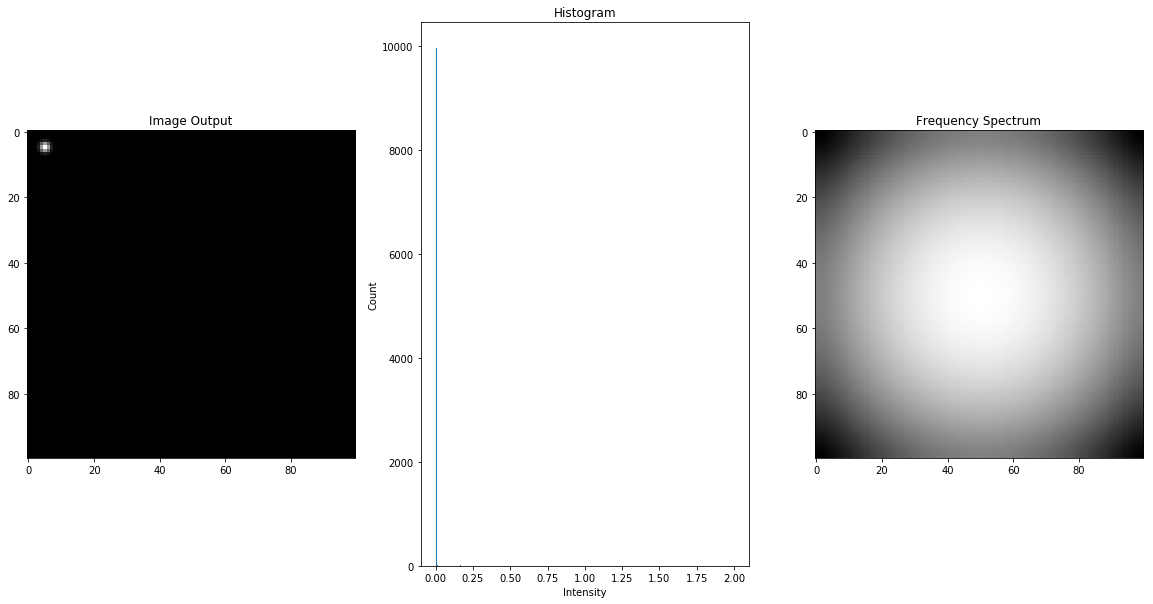

In [31]:
B = np.zeros(image_size)

for x in range(image_size[0]):
    for y in range(image_size[1]):
        exponent = -((np.power((x - 5), 2) / 2) + (np.power((y - 5), 2) / 2))
        B[x, y] = 2 * np.power(np.e, exponent)
        
f = np.fft.fft2(B)
fshift = np.fft.fftshift(f)
B_fft = 20 * np.log(np.abs(fshift))
        
plt.subplots(1, 3, figsize=(20,10))
plt.subplot(1, 3, 1); plt.imshow(B, cmap='gray'); plt.title('Image Output')
plt.subplot(1, 3, 2); plt.hist(B.ravel(), bins=256); plt.title('Histogram'); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.subplot(1, 3, 3); plt.imshow(B_fft, cmap='gray'); plt.title('Frequency Spectrum')
plt.show()

$$ f(x,y) = 20sin(2\pi * f_0 x) $$

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


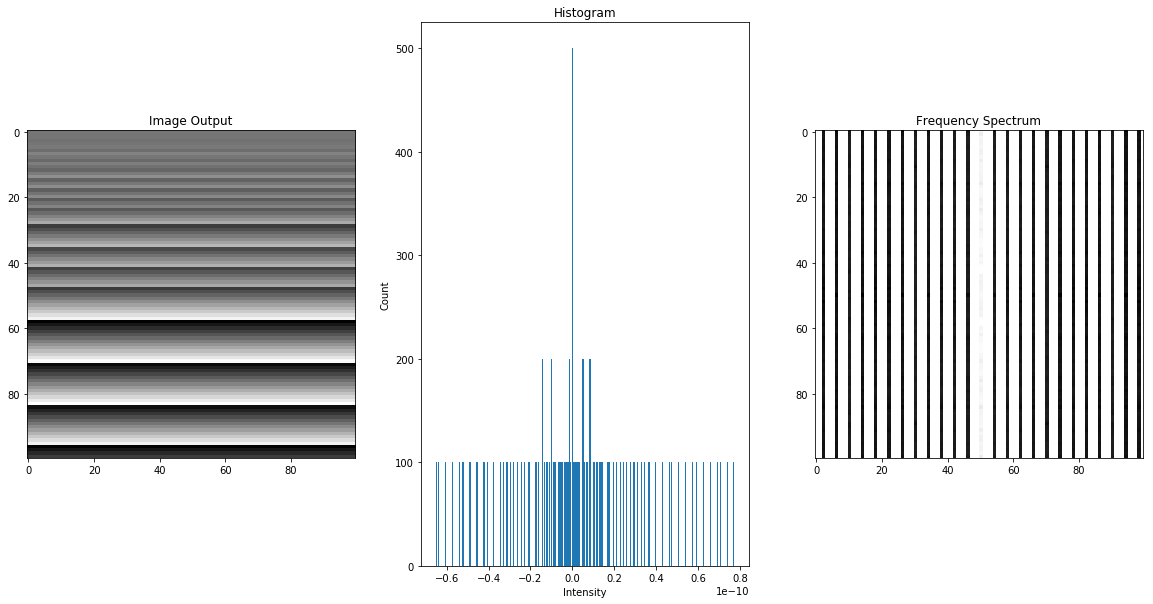

In [32]:
C = np.zeros(image_size)

for x in range(image_size[0]):
    for y in range(image_size[1]):
        C[x, y] = 20 * np.sin(2 * np.pi * f_not * x)
        
f = np.fft.fft2(C)
fshift = np.fft.fftshift(f)
C_fft = 20 * np.log(np.abs(fshift))
        
plt.subplots(1, 3, figsize=(20,10))
plt.subplot(1, 3, 1); plt.imshow(C, cmap='gray'); plt.title('Image Output')
plt.subplot(1, 3, 2); plt.hist(C.ravel(), bins=256); plt.title('Histogram'); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.subplot(1, 3, 3); plt.imshow(C_fft, cmap='gray'); plt.title('Frequency Spectrum')
plt.show()

$$ f(x,y) = \begin{cases} 1 & -10 < x < 10 - 10 < y < 10 \\ 0& \text{otherwise}\end{cases}$$

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log


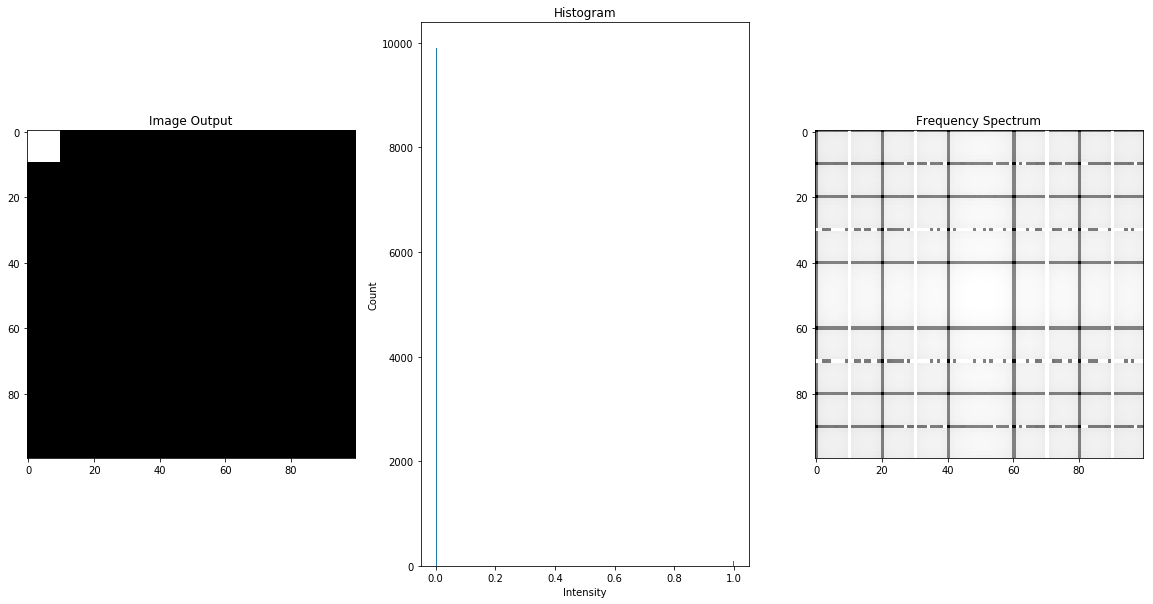

In [33]:
D = np.zeros(image_size)

for x in range(image_size[0]):
    for y in range(image_size[1]):
        if (-10 < x and x < 10) and (-10 < y and y < 10):
            D[x, y] = 1
        else:
            D[x, y] = 0
        
f = np.fft.fft2(D)
fshift = np.fft.fftshift(f)
D_fft = 20 * np.log(np.abs(fshift))
        
plt.subplots(1, 3, figsize=(20,10))
plt.subplot(1, 3, 1); plt.imshow(D, cmap='gray'); plt.title('Image Output')
plt.subplot(1, 3, 2); plt.hist(D.ravel(), bins=256); plt.title('Histogram'); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.subplot(1, 3, 3); plt.imshow(D_fft, cmap='gray'); plt.title('Frequency Spectrum')
plt.show()

## Question 3
### Original Objects
<img src="data/1d_objects.png" alt="Original Objects" width="200"/>

### System 1 PSF Transformation
<img src="data/1d_objects_psf1.png" alt="PSF1 Objects" width="200"/>

### System 2 PSF Transformation
<img src="data/1d_objects_psf2.png" alt="PSF2 Objects" width="200"/>

### Comments on PSF

Overall, the application of the point spread function (PSF) from both systems reduces the resolution of the input object images. This is much more significant in objects which contain more vertical components, such as the first and last objects, and is less noticeable for objects that have more horizontal components, such as the second object. This is beacause in this case, the PSF is one-dimensional (applies only to the horizontal component). 
## Question 4
### a) Which is the best system overall?

The best system overall is system 1. This is because this system is horizontal (responds the same to frequencies) for the greatest range. 

### b) Which system is the best for imaging small objects? Explain.

The system which is best for imaging small objects is system 3. This is because this system provides the highest resolution at higher frequencies. However, this higher resolution is not constant at the higher frequencies, so this system would only be preferred for specific frequency bands.

### c) What would be the differences that you can expect on small objects between 1 and 2? Why?

The primary difference between systems 1 and 2 for small objects is that the resolution of smaller objects would begin to decrease sooner for imaging system 2 than imaging system 1. In other words, system 1 would be able to provide a higher resolution for smaller objects, but for a certain object size, their resolution would become approximately the same for both systems.

## Question 5

The minimum FWHM for a point spread function (PSF) with a field of view of 20 cm and resolution 512 x 512 pixels is simply 

$$\frac{20 cm}{512 pixels} = 0.0391 cm/pixel$$

## Question 6

### Histogram 1
<img src="data/Assignment1_hist1.png" alt="Histogram 1" width="100"/>

### Histogram 2
(I know it doesn't look like the eyes are different colors, but each of the eyes and the mouth are different shades! You can use a color picker to be sure!)

<img src="data/Assignment1_hist2.png" alt="Histogram 1" width="100"/>

## Question 7 
<img src="data/roc_curve.png" alt="Roc Curve" width="500"/>

In this example, the most accurate imaging technique is technique B. This is because it's ROC curve indicates that it has the highest true positive detection rate with no compromise to the false positive detection rate (has approximately 95% true positive detection rate at 0% false positive detection rate).